# Analizando los resultados de la Encuesta Nacional de Percepción de Ciencia y Tecnología (ENPECYT 2017) en México

### La nomenclatura "S4P14" significa que es la sección 4, pregunta 14 de la encuesta. Las diferentes respuestas a esa pregunta se representan usando la nomclatura de la pregunta, seguido de un guión bajo y el número de la respuesta "S4P14_1") 

In [1]:
# Ejemplo usando la pregunta 14 de la sección 4 de la encuesta

14. Desempeño de profesiones y actividades.
En una escala del 1 al 10, donde 10 equivale a "Muy respetable" (11 significa que no sabe)

¿en México, cómo califica usted el desempeño de las siguientes profesiones?

1	juez  (columna "S4P14_1")

2	medico (columna "S4P14_2")

3	abogado

4	hombre de negocios

5	periodista

6	banquero

7	ingeniero

8	arquitecto

9	profesor

10	deportista

11	artista

12	bombero

13	enfermera

14	oficial de policía

15	sacerdote o ministro de culto

16	investigador

17	inventor (columna "S4P14_17")


In [2]:
import pandas as pd
import simpledbf # se puede instalar con ! pip install simpledbf
import matplotlib.pyplot as plt

PyTables is not installed. No support for HDF output.
SQLalchemy is not installed. No support for SQL output.


In [3]:
dbf = simpledbf.Dbf5("/home/m/Documents/enpecyt_2017/base_datos/enpecyt2017_cb1.dbf",codec="cp1252")

In [4]:
df=dbf.to_dataframe()

In [5]:
df.dtypes

CD_A        object
PER         object
ENT         object
CON         object
V_SEL       object
             ...  
S4P17_11     int64
S4P17_12     int64
S4P17_13     int64
S4P17_14     int64
FAC          int64
Length: 236, dtype: object

In [6]:
df[:5]

,CD_A,PER,ENT,CON,V_SEL,N_HOG,N_REN,S3P1,S3P1_2,S3P2,...,S4P17_6,S4P17_7,S4P17_8,S4P17_9,S4P17_10,S4P17_11,S4P17_12,S4P17_13,S4P17_14,FAC
0,14,1117,01,40018,3,1,01,3,3,NaN,...,2,3,3,2,2,2,2,1,2,5072
1,14,1117,01,40018,4,1,01,2,6,NaN,...,3,3,3,3,3,3,2,3,3,5072
2,14,1117,01,40018,2,1,01,2,6,NaN,...,3,3,3,3,3,3,2,3,3,7608
3,14,1117,01,40018,1,1,03,4,3,NaN,...,2,2,3,3,3,2,2,3,3,10144
4,14,1117,01,40018,5,1,02,3,3,NaN,...,3,3,3,3,3,3,1,3,3,5072


In [7]:
prelista=pd.Series(df.keys())[182:199]
prelista

182     S4P14_1
183     S4P14_2
184     S4P14_3
185     S4P14_4
186     S4P14_5
187     S4P14_6
188     S4P14_7
189     S4P14_8
190     S4P14_9
191    S4P14_10
192    S4P14_11
193    S4P14_12
194    S4P14_13
195    S4P14_14
196    S4P14_15
197    S4P14_16
198    S4P14_17
dtype: object

append(other[, ignore_index, …])	Append rows of other to the end of this frame, returning a new object.

In [8]:
lista=list(prelista)
lista
lista.append("FAC")
lista

['S4P14_1',
 'S4P14_2',
 'S4P14_3',
 'S4P14_4',
 'S4P14_5',
 'S4P14_6',
 'S4P14_7',
 'S4P14_8',
 'S4P14_9',
 'S4P14_10',
 'S4P14_11',
 'S4P14_12',
 'S4P14_13',
 'S4P14_14',
 'S4P14_15',
 'S4P14_16',
 'S4P14_17',
 'FAC']

loc	Access a group of rows and columns by label(s) or a boolean array.


In [9]:
nbase=df.loc[:,lista]
nbase

,S4P14_1,S4P14_2,S4P14_3,S4P14_4,S4P14_5,S4P14_6,S4P14_7,S4P14_8,S4P14_9,S4P14_10,S4P14_11,S4P14_12,S4P14_13,S4P14_14,S4P14_15,S4P14_16,S4P14_17,FAC
0,3,3,3,5,7,7,10,10,10,7,3,10,2,5,5,8,8,5072
1,1,1,5,10,8,5,10,10,10,10,10,10,10,3,5,8,10,5072
2,1,10,1,10,7,4,10,8,6,1,9,10,9,1,10,10,10,7608
3,7,8,7,8,7,7,8,8,8,7,7,9,9,7,8,9,9,10144
4,7,8,7,7,8,8,8,9,8,9,8,10,8,9,9,9,10,5072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2848,5,10,4,9,8,1,6,7,9,4,9,10,4,9,7,10,10,3888
2849,8,10,10,10,10,9,10,10,10,10,8,10,10,8,7,10,10,1602
2850,5,8,7,4,4,4,5,5,6,4,3,10,7,5,10,6,6,2403
2851,6,8,6,9,9,9,10,9,9,8,10,10,9,5,8,10,10,2403


Aqui, te posicionas en una pregunta (S4p14_1, que es la de juez) y agrupas por respuesta, que en este caso va de 1 a 11, entonces los comandos siguientes te regresan aquellos renglones agrupados por respuesta.

In [10]:
per_imp=nbase.groupby("S4P14_1")
per_imp.groups

{1: [1, 2, 7, 47, 53, 75, 87, 95, 101, 102, 113, 168, 195, 235, 242, 262, 272, 282, 283, 295, 313, 316, 320, 345, 377, 395, 398, 419, 422, 434, 443, 448, 463, 482, 487, 492, 498, 510, 512, 530, 541, 557, 558, 569, 596, 601, 611, 637, 742, 752, 769, 777, 784, 792, 796, 801, 806, 827, 831, 859, 866, 883, 887, 895, 903, 905, 921, 940, 949, 958, 1022, 1126, 1147, 1151, 1159, 1169, 1175, 1184, 1214, 1219, 1220, 1245, 1255, 1299, 1314, 1330, 1378, 1394, 1397, 1406, 1432, 1436, 1439, 1449, 1452, 1470, 1472, 1479, 1481, 1485, ...], 2: [52, 122, 154, 199, 317, 356, 387, 413, 423, 462, 480, 497, 573, 647, 744, 778, 782, 849, 857, 925, 947, 990, 1032, 1081, 1105, 1160, 1236, 1272, 1362, 1410, 1522, 1702, 1711, 1727, 1744, 1754, 1812, 1851, 1852, 1918, 1933, 1948, 1968, 1969, 1976, 1998, 2032, 2058, 2069, 2084, 2274, 2299, 2313, 2346, 2382, 2404, 2490, 2498, 2502, 2521, 2534, 2536, 2557, 2571, 2580, 2586, 2598, 2599, 2635, 2656, 2681, 2707, 2724, 2776, 2787, 2795], 3: [0, 33, 79, 112, 146, 180, 21

In [11]:
porpregunta=per_imp["FAC"].sum()
porpregunta

S4P14_1
1     2423405
2      715325
3     1643663
4     2105161
5     7134918
6     5032082
7     5693190
8     7205403
9     1923948
10    1615748
11    1565033
Name: FAC, dtype: int64

In [12]:
total=nbase["FAC"].sum()

In [13]:
cociente=porpregunta/total*100
cociente

S4P14_1
1      6.539514
2      1.930291
3      4.435395
4      5.680738
5     19.253446
6     13.578981
7     15.362969
8     19.443648
9      5.191738
10     4.360066
11     4.223213
Name: FAC, dtype: float64

In [14]:
cociente.name="pre_imp_por"
cociente

S4P14_1
1      6.539514
2      1.930291
3      4.435395
4      5.680738
5     19.253446
6     13.578981
7     15.362969
8     19.443648
9      5.191738
10     4.360066
11     4.223213
Name: pre_imp_por, dtype: float64

<AxesSubplot: xlabel='S4P14_1'>

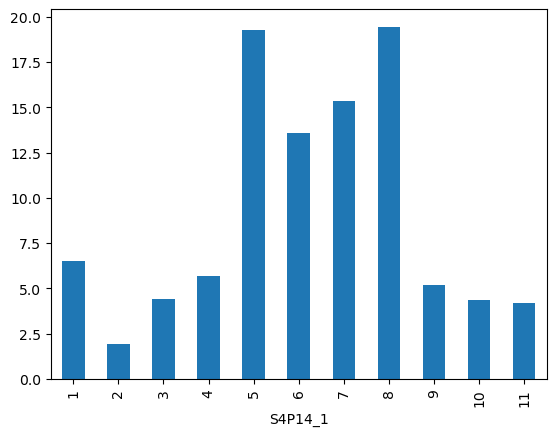

In [15]:
cociente.plot(kind="bar")

In [16]:
def porcentajes(columna):
    if(columna.name == "FAC"):
        return
    temp = nbase.groupby(columna.name)
    temp0=temp["FAC"].sum()/nbase["FAC"].sum()*100
    temp0.name = columna.name
    return temp0

In [17]:
nuevo = nbase.apply(porcentajes)
nuevo

,S4P14_1,S4P14_2,S4P14_3,S4P14_4,S4P14_5,S4P14_6,S4P14_7,S4P14_8,S4P14_9,S4P14_10,S4P14_11,S4P14_12,S4P14_13,S4P14_14,S4P14_15,S4P14_16,S4P14_17,FAC
1,6.539514,0.376411,4.175212,0.928181,0.620127,1.988114,0.463159,0.501262,0.539086,1.650335,0.824640,0.188171,0.128642,15.697346,3.936356,0.226268,0.419217,None
2,1.930291,0.335049,3.108546,0.668975,1.070496,0.943710,0.370151,0.431209,0.495738,0.442940,1.349934,0.231738,0.187283,3.463091,1.174868,0.155300,0.266680,None
3,4.435395,0.405425,5.465499,1.787329,1.980982,2.412035,0.393503,0.427488,0.479142,0.507126,1.297875,0.140353,0.192356,7.208138,3.990536,0.493555,0.444432,None
4,5.680738,0.802385,7.196443,4.939768,0.976446,4.030342,1.374061,1.231995,1.065290,1.023939,1.573819,0.128844,0.184104,6.094764,3.358579,0.546049,0.388786,None
5,19.253446,4.457393,14.824042,10.991623,6.241936,12.467857,4.235254,3.579334,4.561373,4.248622,6.776101,0.673819,2.286699,16.920630,15.841596,1.836516,1.596713,None
6,13.578981,3.342137,12.143888,11.691450,6.398796,13.117606,4.640306,3.966212,3.830735,5.715881,6.848711,1.667025,1.547331,10.982710,11.116333,4.047161,2.345393,None
7,15.362969,7.926782,15.801308,18.893258,15.991777,15.750390,13.986730,12.622302,12.880525,10.385104,14.423439,1.985948,4.471821,16.658305,16.142390,6.847268,5.637147,None
8,19.443648,31.329561,21.069402,19.322087,30.285519,24.713686,31.314671,32.661192,25.984107,21.968016,20.872529,9.726135,20.780473,12.316742,18.162879,20.333281,13.400487,None
9,5.191738,24.481654,7.671708,15.645344,20.171639,12.577977,22.147408,23.032318,25.443083,21.357705,19.607481,23.711162,28.163597,4.884759,10.451552,26.454158,22.101086,None
10,4.360066,25.869570,5.926662,10.900182,13.346531,8.136362,18.345787,18.865933,23.609931,30.872511,24.575648,59.549198,41.526430,5.090151,13.996531,34.567497,48.425468,None


In [18]:
nuevo2 = nuevo.drop(["FAC"], axis=1)
nuevo2

,S4P14_1,S4P14_2,S4P14_3,S4P14_4,S4P14_5,S4P14_6,S4P14_7,S4P14_8,S4P14_9,S4P14_10,S4P14_11,S4P14_12,S4P14_13,S4P14_14,S4P14_15,S4P14_16,S4P14_17
1,6.539514,0.376411,4.175212,0.928181,0.620127,1.988114,0.463159,0.501262,0.539086,1.650335,0.824640,0.188171,0.128642,15.697346,3.936356,0.226268,0.419217
2,1.930291,0.335049,3.108546,0.668975,1.070496,0.943710,0.370151,0.431209,0.495738,0.442940,1.349934,0.231738,0.187283,3.463091,1.174868,0.155300,0.266680
3,4.435395,0.405425,5.465499,1.787329,1.980982,2.412035,0.393503,0.427488,0.479142,0.507126,1.297875,0.140353,0.192356,7.208138,3.990536,0.493555,0.444432
4,5.680738,0.802385,7.196443,4.939768,0.976446,4.030342,1.374061,1.231995,1.065290,1.023939,1.573819,0.128844,0.184104,6.094764,3.358579,0.546049,0.388786
5,19.253446,4.457393,14.824042,10.991623,6.241936,12.467857,4.235254,3.579334,4.561373,4.248622,6.776101,0.673819,2.286699,16.920630,15.841596,1.836516,1.596713
6,13.578981,3.342137,12.143888,11.691450,6.398796,13.117606,4.640306,3.966212,3.830735,5.715881,6.848711,1.667025,1.547331,10.982710,11.116333,4.047161,2.345393
7,15.362969,7.926782,15.801308,18.893258,15.991777,15.750390,13.986730,12.622302,12.880525,10.385104,14.423439,1.985948,4.471821,16.658305,16.142390,6.847268,5.637147
8,19.443648,31.329561,21.069402,19.322087,30.285519,24.713686,31.314671,32.661192,25.984107,21.968016,20.872529,9.726135,20.780473,12.316742,18.162879,20.333281,13.400487
9,5.191738,24.481654,7.671708,15.645344,20.171639,12.577977,22.147408,23.032318,25.443083,21.357705,19.607481,23.711162,28.163597,4.884759,10.451552,26.454158,22.101086
10,4.360066,25.869570,5.926662,10.900182,13.346531,8.136362,18.345787,18.865933,23.609931,30.872511,24.575648,59.549198,41.526430,5.090151,13.996531,34.567497,48.425468


<AxesSubplot: >

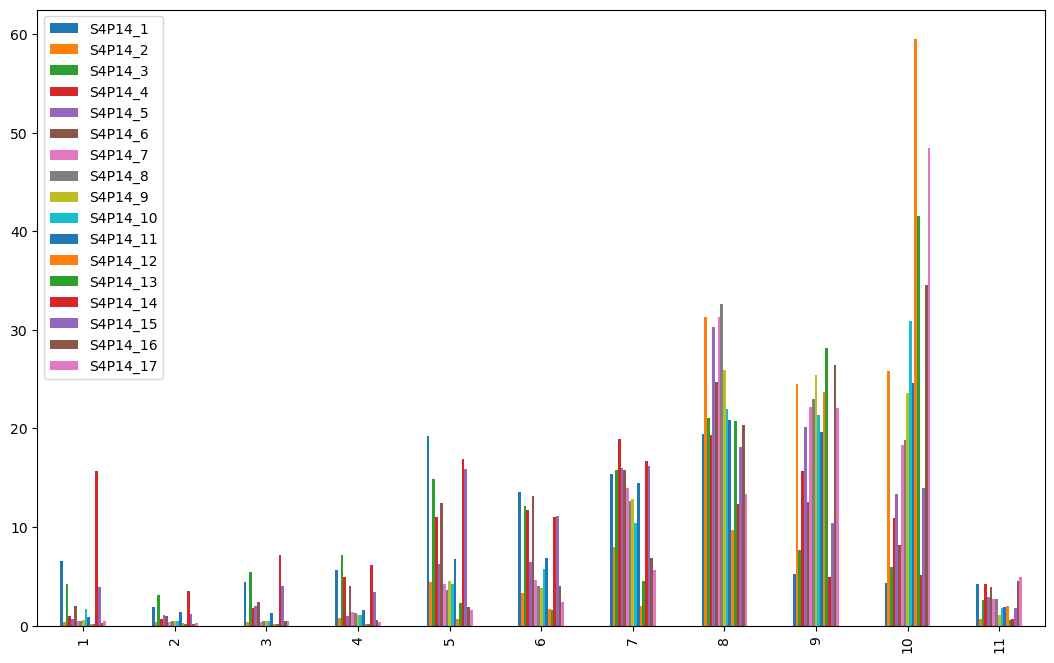

In [19]:
nuevo2.plot(kind="bar",figsize=(13,8))

In [20]:
nuevo2.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [21]:
nuevo2.columns

Index(['S4P14_1', 'S4P14_2', 'S4P14_3', 'S4P14_4', 'S4P14_5', 'S4P14_6',
       'S4P14_7', 'S4P14_8', 'S4P14_9', 'S4P14_10', 'S4P14_11', 'S4P14_12',
       'S4P14_13', 'S4P14_14', 'S4P14_15', 'S4P14_16', 'S4P14_17'],
      dtype='object')

In [22]:
nuevo2.rename(index=str, columns={"S4P14_1": "jueza", "S4P14_2": "c"})

,jueza,c,S4P14_3,S4P14_4,S4P14_5,S4P14_6,S4P14_7,S4P14_8,S4P14_9,S4P14_10,S4P14_11,S4P14_12,S4P14_13,S4P14_14,S4P14_15,S4P14_16,S4P14_17
1,6.539514,0.376411,4.175212,0.928181,0.620127,1.988114,0.463159,0.501262,0.539086,1.650335,0.824640,0.188171,0.128642,15.697346,3.936356,0.226268,0.419217
2,1.930291,0.335049,3.108546,0.668975,1.070496,0.943710,0.370151,0.431209,0.495738,0.442940,1.349934,0.231738,0.187283,3.463091,1.174868,0.155300,0.266680
3,4.435395,0.405425,5.465499,1.787329,1.980982,2.412035,0.393503,0.427488,0.479142,0.507126,1.297875,0.140353,0.192356,7.208138,3.990536,0.493555,0.444432
4,5.680738,0.802385,7.196443,4.939768,0.976446,4.030342,1.374061,1.231995,1.065290,1.023939,1.573819,0.128844,0.184104,6.094764,3.358579,0.546049,0.388786
5,19.253446,4.457393,14.824042,10.991623,6.241936,12.467857,4.235254,3.579334,4.561373,4.248622,6.776101,0.673819,2.286699,16.920630,15.841596,1.836516,1.596713
6,13.578981,3.342137,12.143888,11.691450,6.398796,13.117606,4.640306,3.966212,3.830735,5.715881,6.848711,1.667025,1.547331,10.982710,11.116333,4.047161,2.345393
7,15.362969,7.926782,15.801308,18.893258,15.991777,15.750390,13.986730,12.622302,12.880525,10.385104,14.423439,1.985948,4.471821,16.658305,16.142390,6.847268,5.637147
8,19.443648,31.329561,21.069402,19.322087,30.285519,24.713686,31.314671,32.661192,25.984107,21.968016,20.872529,9.726135,20.780473,12.316742,18.162879,20.333281,13.400487
9,5.191738,24.481654,7.671708,15.645344,20.171639,12.577977,22.147408,23.032318,25.443083,21.357705,19.607481,23.711162,28.163597,4.884759,10.451552,26.454158,22.101086
10,4.360066,25.869570,5.926662,10.900182,13.346531,8.136362,18.345787,18.865933,23.609931,30.872511,24.575648,59.549198,41.526430,5.090151,13.996531,34.567497,48.425468
